In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
sells_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/sells.csv'
buys_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/buys.csv'
stocks_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/stocks.csv'
dividends_url = 'https://raw.githubusercontent.com/santimcs/obsidian-git-sync/main/Data/dividends.csv'

sells = pd.read_csv(sells_url)
buys = pd.read_csv(buys_url)
stocks = pd.read_csv(stocks_url)
dividends = pd.read_csv(dividends_url)

In [2]:
pd.options.display.float_format = '{:,.2f}'.format
# Merge the dataframes
sales = sells.merge(buys, left_on='buy_id', right_on='id', suffixes=('_sell', '_buy'))
sales = sales.merge(stocks, left_on='stock_id', right_on='id', suffixes=('_sell', '_stock'))

# Display the merged dataframe
sales.head()

,buy_id,date_sell,year_sell,month_sell,price_sell,qty_sell,amt_sell,net_sell,profit,days,...,price_buy,qty_buy,amt_buy,net_buy,status,kind,id_stock,name,market,website
0,1272,2023-07-21,2023,7,167.00,400,"66,800.00","66,652.04","4,514.72",14,...,155.00,400,"62,000.00","62,137.32",Sold,DTD,211,BBL,SET50,https://www.bangkokbank.com/
1,1263,2023-07-13,2023,7,45.00,900,"40,500.00","40,410.29","-4,689.38",28,...,50.00,900,"45,000.00","45,099.67",Sold,DTD,84,KTC,SET50,www.ktc.co.th
2,1260,2023-06-08,2023,6,52.50,400,"21,000.00","20,953.49",909.19,1,...,50.00,400,"20,000.00","20,044.30",Sold,DTD,84,KTC,SET50,www.ktc.co.th
3,1043,2021-11-17,2021,11,59.00,2000,"118,000.00","117,738.64","1,481.71",49,...,58.00,2000,"116,000.00","116,256.93",Sold,DTD,84,KTC,SET50,www.ktc.co.th
4,1022,2021-11-08,2021,11,59.00,2000,"118,000.00","117,738.64","1,481.71",40,...,58.00,2000,"116,000.00","116,256.93",Sold,DTD,84,KTC,SET50,www.ktc.co.th


### Sales Analysis

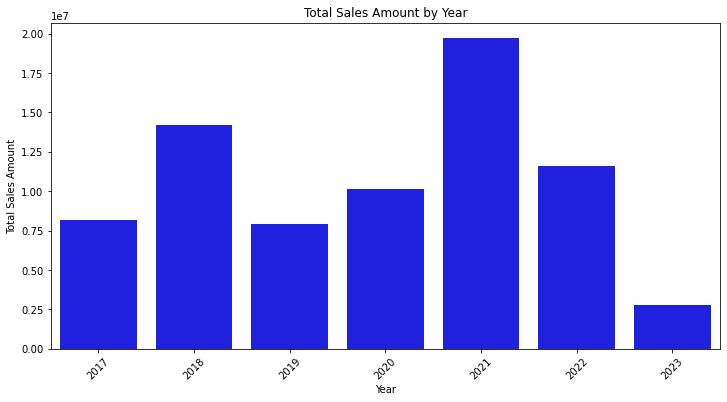

In [3]:
# Calculate the total sales amount by year
sales_amount_by_year = sales.groupby('year_sell')['amt_sell'].sum()

# Create a bar plot for the total sales amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x=sales_amount_by_year.index, y=sales_amount_by_year.values, color='blue')
plt.title('Total Sales Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Sales Amount')
plt.xticks(rotation=45)
plt.show()

In [4]:
sales_amount_by_year.to_frame()

,amt_sell
year_sell,
2017,"8,142,490.00"
2018,"14,167,950.00"
2019,"7,897,675.00"
2020,"10,108,070.00"
2021,"19,712,845.00"
2022,"11,600,885.00"
2023,"2,797,470.00"


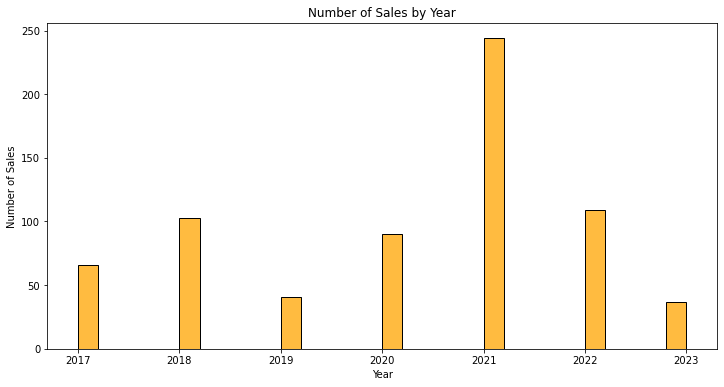

In [8]:
# Extract the year from the sell date
sales['date_sell'] = pd.to_datetime(sales['date_sell'])
sales['year'] = sales['date_sell'].dt.year

# Create a histogram for the number of sales by year
plt.figure(figsize=(12, 6))
sns.histplot(sales['year'], bins=30, color='orange', kde=False)
plt.title('Number of Sales by Year')
plt.xlabel('Year')
plt.ylabel('Number of Sales')
plt.show()

In [50]:
yearly_sales = sales.groupby('year')['date_sell'].count()
yearly_sales

year
2017     66
2018    103
2019     41
2020     90
2021    244
2022    109
2023     37
Name: date_sell, dtype: int64

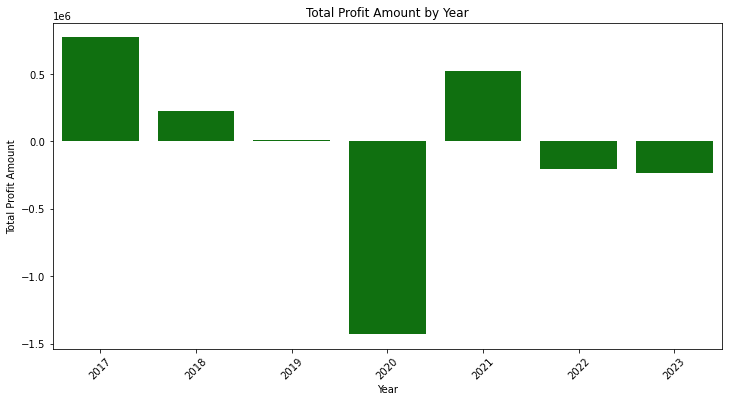

In [20]:
# Calculate the total sales amount by year
profit_amount_by_year = sales.groupby('year_sell')['profit'].sum()

# Create a bar plot for the total profit amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_amount_by_year.index, y=profit_amount_by_year.values, color='green')
plt.title('Total Profit Amount by Year')
plt.xlabel('Year')
plt.ylabel('Total Profit Amount')
plt.xticks(rotation=45)
plt.show()

In [21]:
profit_amount_by_year.to_frame()

,profit
year_sell,
2017,"772,818.01"
2018,"223,705.73"
2019,"11,250.02"
2020,"-1,428,227.86"
2021,"520,814.94"
2022,"-201,413.37"
2023,"-237,670.10"


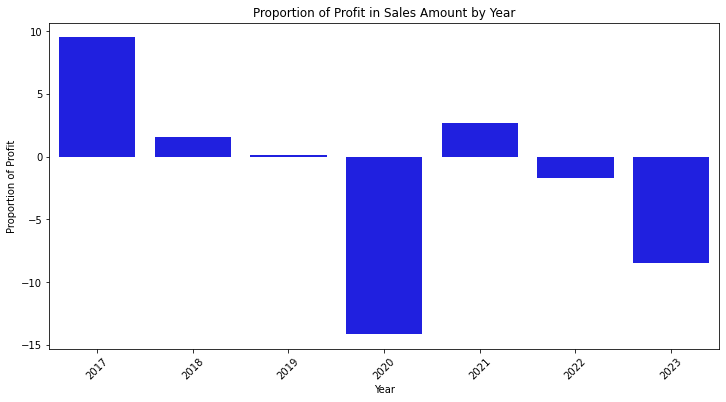

In [22]:
# Calculate the total profit by year
total_profit_by_year = sales.groupby('year_sell')['profit'].sum()

# Calculate the proportion of profit in sales amount by year
profit_proportion_by_year = (total_profit_by_year / sales_amount_by_year) * 100

# Create a bar plot for the proportion of profit in sales amount by year
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_proportion_by_year.index, y=profit_proportion_by_year.values, color='blue')
plt.title('Proportion of Profit in Sales Amount by Year')
plt.xlabel('Year')
plt.ylabel('Proportion of Profit')
plt.xticks(rotation=45)
plt.show()

In [23]:
profit_proportion_by_year.to_frame().rename(columns={0: 'Profit Percent'})
#profit_percent_by_stock_2023_sorted.to_frame().reset_index().rename(columns={'name': 'Stock', 0: 'Profit Percent'})

,Profit Percent
year_sell,
2017,9.49
2018,1.58
2019,0.14
2020,-14.13
2021,2.64
2022,-1.74
2023,-8.50


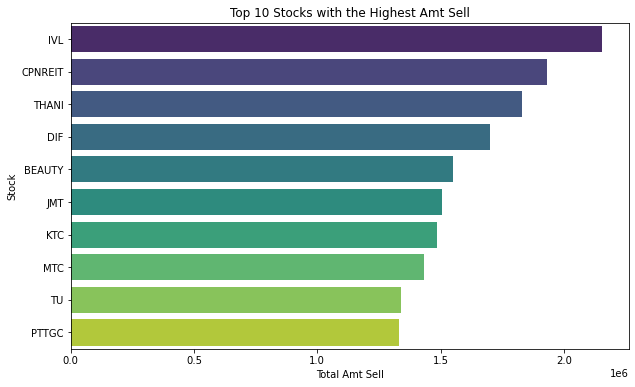

In [24]:
# Calculate the total amt sell per stock
total_amt_sell_per_stock = sales.groupby('name')['amt_sell'].sum().sort_values(ascending=False)

# Get the top 10 stocks with the highest total amt sell
top_10_stocks = total_amt_sell_per_stock.head(10)

# Create a bar plot for the top 10 stocks with the highest total amt sell
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stocks.values, y=top_10_stocks.index, palette='viridis')
plt.title('Top 10 Stocks with the Highest Amt Sell')
plt.xlabel('Total Amt Sell')
plt.ylabel('Stock')
plt.show()

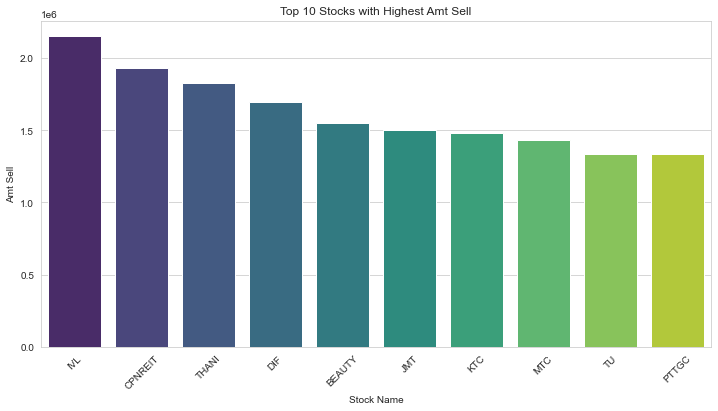

In [25]:
# Set the style of the visuals
sns.set_style('whitegrid')
# Calculate the total amt sell per stock
total_amt_sell_per_stock = sales.groupby('name')['amt_sell'].sum().sort_values(ascending=False)

# Get the top 10 stocks with the highest total amt sell
top_10_stocks = total_amt_sell_per_stock.head(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks.index, y=top_10_stocks.values, palette='viridis')
plt.title('Top 10 Stocks with Highest Amt Sell')
plt.xlabel('Stock Name')
plt.ylabel('Amt Sell')
plt.xticks(rotation=45)
plt.show()

In [26]:
top_10_stocks.to_frame()

,amt_sell
name,
IVL,"2,153,600.00"
CPNREIT,"1,929,400.00"
THANI,"1,827,500.00"
DIF,"1,698,400.00"
BEAUTY,"1,550,300.00"
JMT,"1,503,775.00"
KTC,"1,483,500.00"
MTC,"1,430,425.00"
TU,"1,338,200.00"


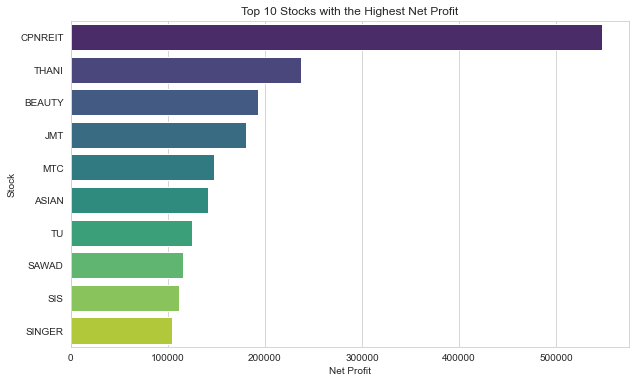

In [27]:
# Calculate the total net profit per stock
total_net_profit_per_stock = sales.groupby('name')['profit'].sum().sort_values(ascending=False)

# Get the top 10 stocks with the highest net profit
top_10_stocks = total_net_profit_per_stock.head(10)

# Create a bar plot for the top 10 stocks with the highest net profit
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stocks.values, y=top_10_stocks.index, palette='viridis')
plt.title('Top 10 Stocks with the Highest Net Profit')
plt.xlabel('Net Profit')
plt.ylabel('Stock')
plt.show()

In [28]:
top_10_stocks.to_frame()

,profit
name,
CPNREIT,"547,131.19"
THANI,"237,046.32"
BEAUTY,"192,974.08"
JMT,"180,878.07"
MTC,"147,177.71"
ASIAN,"141,685.61"
TU,"125,061.53"
SAWAD,"115,506.59"
SIS,"110,986.74"


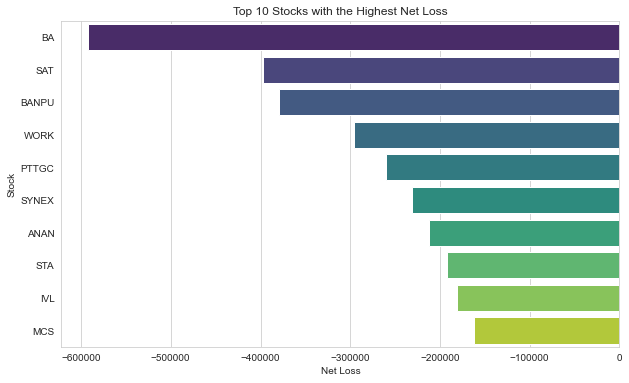

In [29]:
# Calculate the total net loss per stock
total_net_loss_per_stock = sales[sales['profit'] < 0].groupby('name')['profit'].sum().sort_values()

# Get the top 10 stocks with the highest net loss
top_10_stocks_with_highest_net_loss = total_net_loss_per_stock.head(10)

# Create a bar plot for the top 10 stocks with the highest net loss
plt.figure(figsize=(10, 6))
sns.barplot(x=top_10_stocks_with_highest_net_loss.values, y=top_10_stocks_with_highest_net_loss.index, palette='viridis')
plt.title('Top 10 Stocks with the Highest Net Loss')
plt.xlabel('Net Loss')
plt.ylabel('Stock')
plt.show()

In [30]:
top_10_stocks_with_highest_net_loss.to_frame()

,profit
name,
BA,"-592,225.03"
SAT,"-397,317.50"
BANPU,"-378,993.43"
WORK,"-295,292.41"
PTTGC,"-260,539.98"
SYNEX,"-231,329.18"
ANAN,"-212,334.18"
STA,"-191,932.38"
IVL,"-181,457.70"


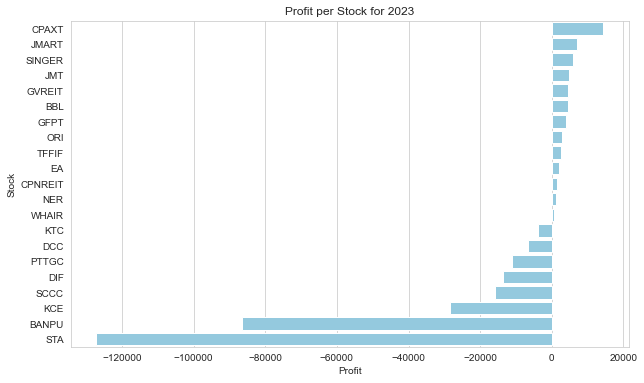

In [31]:
# Filter the sales for the year 2023
sales_2023 = sales[sales['year_sell'] == 2023]

# Calculate the average profit per stock for the year 2023
profit_per_stock_2023 = sales_2023.groupby('name')['profit'].sum().sort_values(ascending=False)

# Create a bar chart for the average profit per stock for the year 2023
plt.figure(figsize=(10, 6))
sns.barplot(x=profit_per_stock_2023.values, y=profit_per_stock_2023.index, color='skyblue')
plt.title('Profit per Stock for 2023')
plt.xlabel('Profit')
plt.ylabel('Stock')
plt.show()

In [32]:
profit_per_stock_2023

name
CPAXT       14,372.89
JMART        6,935.99
SINGER       5,847.49
JMT          4,922.09
GVREIT       4,594.67
BBL          4,514.72
GFPT         4,074.74
ORI          2,857.81
TFFIF        2,482.22
EA           2,092.91
CPNREIT      1,361.13
NER          1,095.46
WHAIR          656.69
KTC         -3,780.19
DCC         -6,773.43
PTTGC      -11,197.69
DIF        -13,516.74
SCCC       -15,875.76
KCE        -28,529.94
BANPU      -86,544.88
STA       -127,260.28
Name: profit, dtype: float64

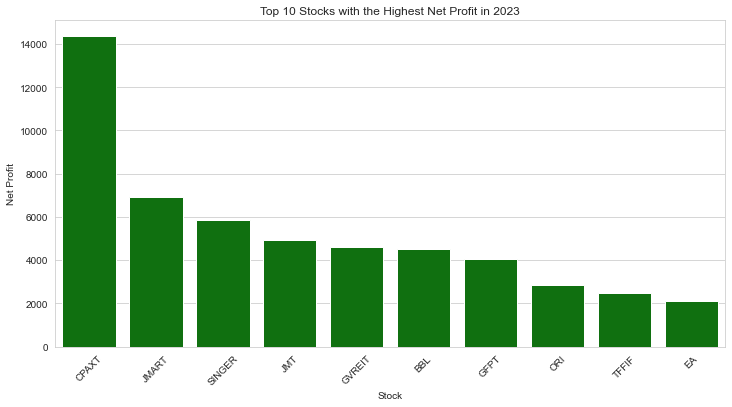

In [33]:
# Filter the sales data for the year 2023
sales_2023 = sales[sales['year_sell'] == 2023]
# Calculate the net profit for each stock in 2023
net_profit_by_stock_2023 = sales_2023.groupby('name')['profit'].sum()

# Get the top 10 stocks with the highest net profit in 2023
top_10_stocks_2023 = net_profit_by_stock_2023.nlargest(10)

# Create a bar plot for the top 10 stocks with the highest net profit in 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks_2023.index, y=top_10_stocks_2023.values, color='green')
plt.title('Top 10 Stocks with the Highest Net Profit in 2023')
plt.xlabel('Stock')
plt.ylabel('Net Profit')
plt.xticks(rotation=45)
plt.show()

In [34]:
top_10_stocks_2023.to_frame()

,profit
name,
CPAXT,"14,372.89"
JMART,"6,935.99"
SINGER,"5,847.49"
JMT,"4,922.09"
GVREIT,"4,594.67"
BBL,"4,514.72"
GFPT,"4,074.74"
ORI,"2,857.81"
TFFIF,"2,482.22"


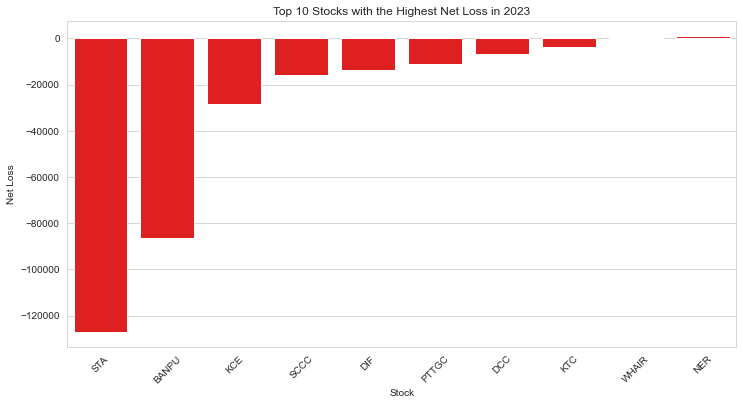

In [35]:
# Get the top 10 stocks with the highest net loss in 2023
top_10_stocks_loss_2023 = net_profit_by_stock_2023.nsmallest(10)

# Create a bar plot for the top 10 stocks with the highest net loss in 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_stocks_loss_2023.index, y=top_10_stocks_loss_2023.values, color='red')
plt.title('Top 10 Stocks with the Highest Net Loss in 2023')
plt.xlabel('Stock')
plt.ylabel('Net Loss')
plt.xticks(rotation=45)
plt.show()

In [36]:
top_10_stocks_loss_2023.to_frame()

,profit
name,
STA,"-127,260.28"
BANPU,"-86,544.88"
KCE,"-28,529.94"
SCCC,"-15,875.76"
DIF,"-13,516.74"
PTTGC,"-11,197.69"
DCC,"-6,773.43"
KTC,"-3,780.19"
WHAIR,656.69


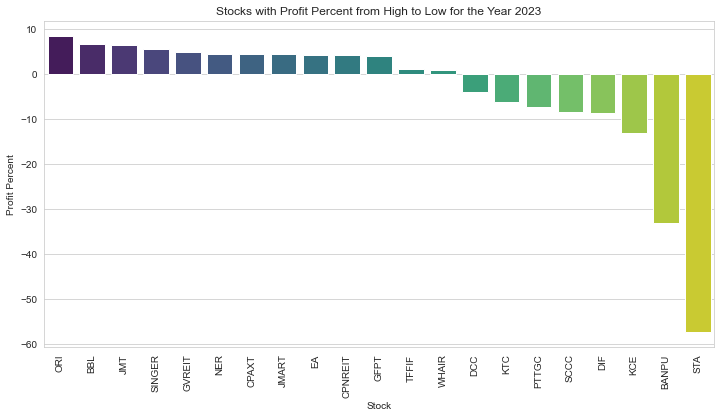

In [37]:
# Filter the sales data for the year 2023
sales_2023 = sales[sales['year_sell'] == 2023]
# Calculate the profit percent for each stock in 2023
profit_percent_by_stock_2023 = (sales_2023.groupby('name')['profit'].sum() / sales_2023.groupby('name')['amt_sell'].sum()) * 100

# Sort the stocks by profit percent from high to low
profit_percent_by_stock_2023_sorted = profit_percent_by_stock_2023.sort_values(ascending=False)

# Create a bar plot for the stocks with profit percent from high to low for the year 2023
plt.figure(figsize=(12, 6))
sns.barplot(x=profit_percent_by_stock_2023_sorted.index, y=profit_percent_by_stock_2023_sorted.values, palette='viridis')
plt.title('Stocks with Profit Percent from High to Low for the Year 2023')
plt.xlabel('Stock')
plt.ylabel('Profit Percent')
plt.xticks(rotation=90)
plt.show()

In [38]:
# Display the profit percent by stock in 2023 in a table format
profit_percent_by_stock_2023_sorted.to_frame().rename(columns={0: 'Profit Percent'})

,Profit Percent
name,
ORI,8.51
BBL,6.76
JMT,6.42
SINGER,5.55
GVREIT,4.89
NER,4.53
CPAXT,4.51
JMART,4.38
EA,4.37


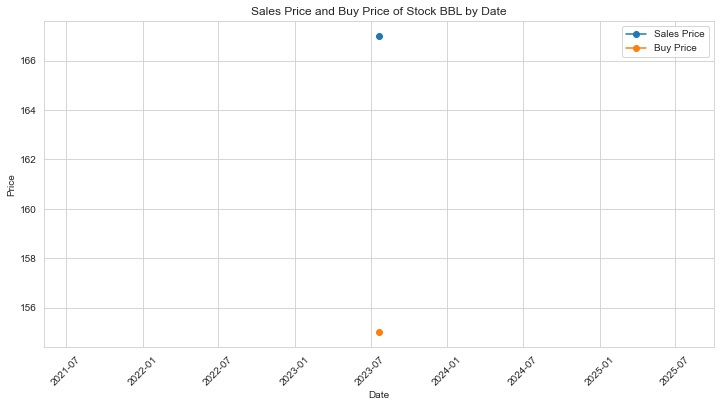

In [39]:
sales_BBL = sales[sales['name'] == 'BBL']
# Calculate the sales amount by date_sell
sales_price_by_date = sales_BBL.groupby('date_sell')['price_sell'].mean()
# Calculate the buy price by date_sell
buy_price_by_date = sales_BBL.groupby('date_sell')['price_buy'].mean()

# CrBBLte a line chart of sales amount and buy price by date_sell
plt.figure(figsize=(12, 6))
plt.plot(sales_price_by_date.index, sales_price_by_date.values, marker='o', label='Sales Price')
plt.plot(buy_price_by_date.index, buy_price_by_date.values, marker='o', label='Buy Price')
plt.title('Sales Price and Buy Price of Stock BBL by Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.legend()
plt.show()

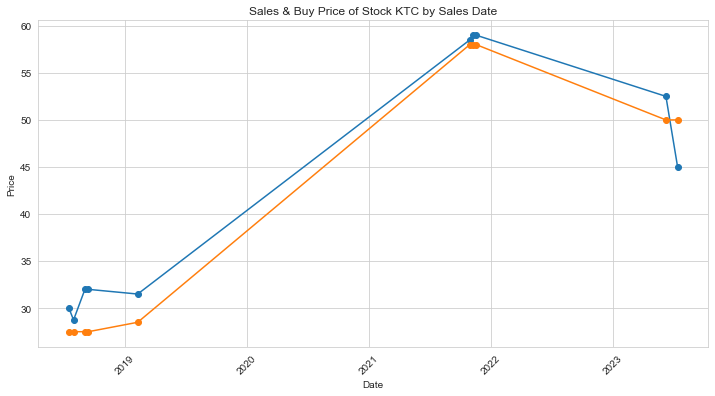

In [40]:
# Filter the sales data for the stock 'KTC'
sales_KTC = sales[sales['name'] == 'KTC']

# Calculate the sales amount by date_sell
sales_price_by_date = sales_KTC.groupby('date_sell')['price_sell'].mean()
# Calculate the buy price by date_sell
buy_price_by_date = sales_KTC.groupby('date_sell')['price_buy'].mean()
# Create a line chart of sales amount by date_sell
plt.figure(figsize=(12, 6))
plt.plot(sales_price_by_date.index, sales_price_by_date.values, marker='o', label='Sell Price')
plt.plot(sales_price_by_date.index, buy_price_by_date.values, marker='o', label='Buy Price')
plt.title('Sales & Buy Price of Stock KTC by Sales Date')
plt.xlabel('Date')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

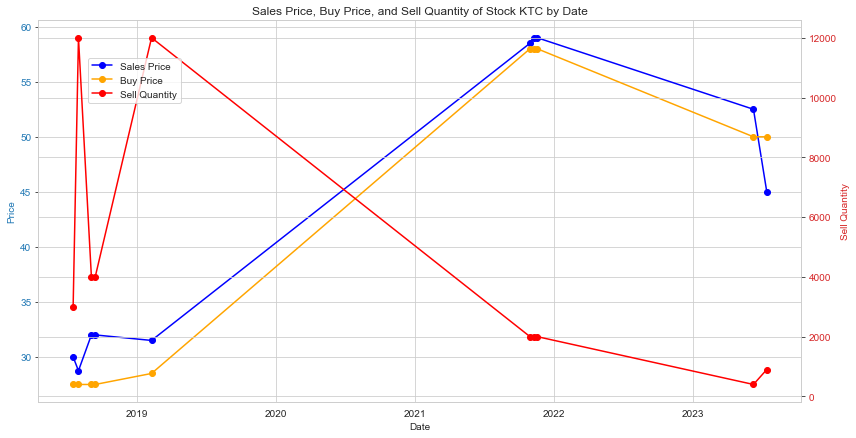

In [41]:
# Calculate the sell quantity by date_sell
sell_qty_by_date = sales_KTC.groupby('date_sell')['qty_sell'].sum()

# Create a line chart of sales amount, buy price, and sell quantity by date_sell
fig, ax1 = plt.subplots(figsize=(12, 6))

color = 'tab:blue'
ax1.set_xlabel('Date')
ax1.set_ylabel('Price', color=color)
ax1.plot(sales_price_by_date.index, sales_price_by_date.values, color='blue', marker='o', label='Sales Price')
ax1.plot(buy_price_by_date.index, buy_price_by_date.values, color='orange', marker='o', label='Buy Price')
ax1.tick_params(axis='y', labelcolor=color)
ax1.grid(True)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:red'  # we already handled the x-label with ax1
ax2.set_ylabel('Sell Quantity', color=color)  # we alrKTCdy handled the x-label with ax1
ax2.plot(sell_qty_by_date.index, sell_qty_by_date.values, color='red', marker='o', label='Sell Quantity')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.title('Sales Price, Buy Price, and Sell Quantity of Stock KTC by Date')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

### Dividend Analysis

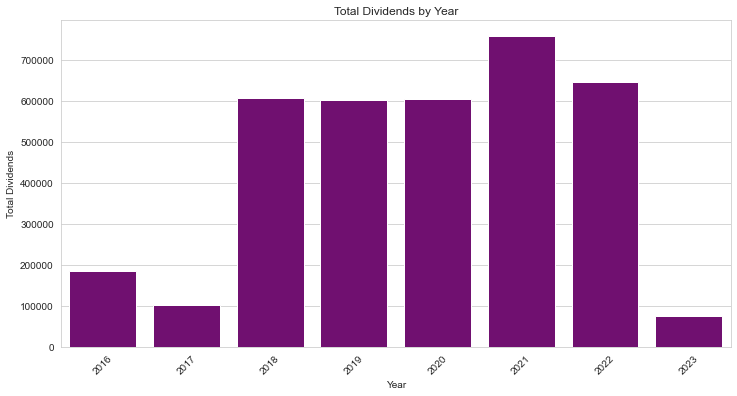

In [27]:
# Calculate the total dividends by year
dividends_by_year = dividends.groupby('year')['amt'].sum()

# Create a bar plot for the total dividends by year
plt.figure(figsize=(12, 6))
sns.barplot(x=dividends_by_year.index, y=dividends_by_year.values, color='purple')
plt.title('Total Dividends by Year')
plt.xlabel('Year')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [28]:
dividends_by_year.to_frame()

,amt
year,
2016,"185,537.60"
2017,"102,343.50"
2018,"605,859.60"
2019,"601,462.95"
2020,"603,486.53"
2021,"758,673.21"
2022,"646,064.60"
2023,"74,374.00"


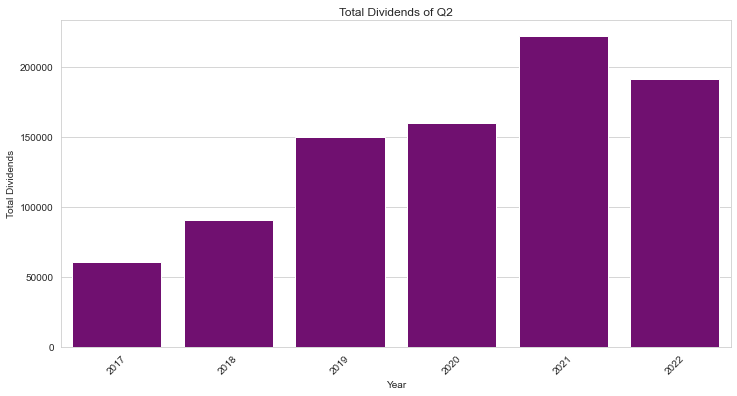

In [29]:
# Filter the dividends data for the year 2023
dividends_of_q2 = dividends[dividends['quarter'] == 2]
# Calculate the total dividends by year
dividends_by_qtr = dividends_of_q2.groupby('year')['amt'].sum()

# Create a bar plot for the total dividends by qtr
plt.figure(figsize=(12, 6))
sns.barplot(x=dividends_by_qtr.index, y=dividends_by_qtr.values, color='purple')
plt.title('Total Dividends of Q2')
plt.xlabel('Year')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [30]:
dividends_by_qtr.to_frame()

,amt
year,
2017,"60,443.50"
2018,"90,770.00"
2019,"150,239.30"
2020,"159,687.93"
2021,"222,239.40"
2022,"191,060.60"


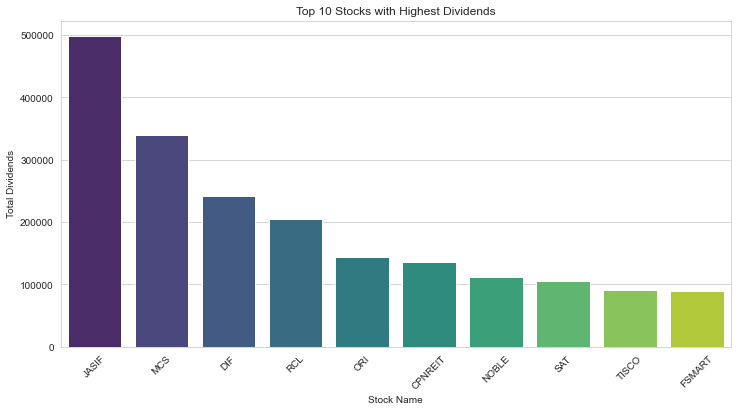

In [31]:
# Calculate the total dividends by stock
dividends_by_stock = dividends.groupby('name')['amt'].sum()

# Get the top 10 stocks with the highest dividends
top_10_dividend_stocks = dividends_by_stock.sort_values(ascending=False).head(10)

# Create a bar plot for the top 10 stocks with the highest dividends
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_dividend_stocks.index, y=top_10_dividend_stocks.values, palette='viridis')
plt.title('Top 10 Stocks with Highest Dividends')
plt.xlabel('Stock Name')
plt.ylabel('Total Dividends')
plt.xticks(rotation=45)
plt.show()

In [32]:
type(top_10_dividend_stocks)

pandas.core.series.Series

In [33]:
top_10_dividend_stocks.to_frame()

,amt
name,
JASIF,"498,200.00"
MCS,"339,050.00"
DIF,"241,639.50"
RCL,"204,000.00"
ORI,"144,350.00"
CPNREIT,"135,443.00"
NOBLE,"112,200.00"
SAT,"105,300.00"
TISCO,"91,400.00"


In [34]:
# Calculate the total profit
total_profit = sales['profit'].sum()
formatted_amt = '{:,.2f}'.format(total_profit)
print(formatted_amt)

-301,425.97


In [35]:
# Calculate the total dividends
total_dividends = dividends['amt'].sum()
formatted_amt = '{:,.2f}'.format(total_dividends)
print(formatted_amt)

3,577,801.99


### By market

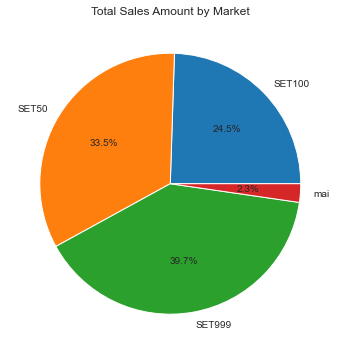

In [36]:
# Calculate the total sales amount by market
sales_amount_by_market = sales.groupby('market')['amt_sell'].sum()

# Create a pie chart of total sales amount by market
plt.figure(figsize=(10, 6))
plt.pie(sales_amount_by_market, labels=sales_amount_by_market.index, autopct='%1.1f%%')
plt.title('Total Sales Amount by Market')
plt.show()

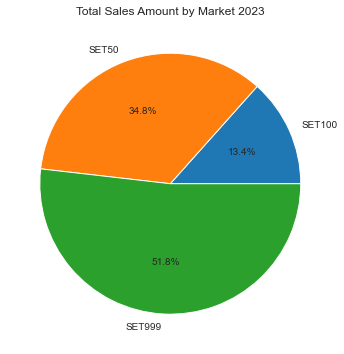

In [37]:
# Filter the sales data for the year 2023
sales_2023 = sales[sales['year_sell'] == 2023]
# Calculate the total sales amount by market
sales_amount_by_market_2023 = sales_2023.groupby('market')['amt_sell'].sum()

# Create a pie chart of total sales amount by market
plt.figure(figsize=(10, 6))
plt.pie(sales_amount_by_market_2023, labels=sales_amount_by_market_2023.index, autopct='%1.1f%%')
plt.title('Total Sales Amount by Market 2023')
plt.show()

In [38]:
df = pd.concat([dividends_by_year, total_profit_by_year],axis=1,keys=['dividend','profit'])
df           

,dividend,profit
2016,"185,537.60",NaN
2017,"102,343.50","772,818.01"
2018,"605,859.60","223,705.73"
2019,"601,462.95","11,250.02"
2020,"603,486.53","-1,415,394.27"
2021,"758,673.21","545,103.35"
2022,"646,064.60","-201,413.37"
2023,"74,374.00","-237,495.44"
